In [1]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Path exists: C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/
Found 1 PNG images.
Total images found after including JPG/JPEG: 155


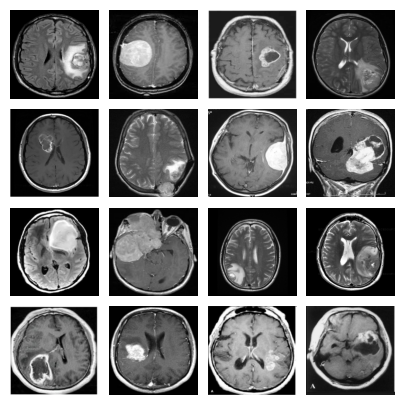

In [12]:
# Check if the file path exists
dataset_path = "C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/"
if not os.path.exists(dataset_path):
    print(f"Path does not exist: {dataset_path}")
else:
    print(f"Path exists: {dataset_path}")

# Use raw string for path and check for multiple file extensions
image_paths = glob.glob(r"C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/*.png")
print(f"Found {len(image_paths)} PNG images.")

# If you have other image formats, like jpg or jpeg, include them too:
image_paths += glob.glob(r"C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/*.jpg")
image_paths += glob.glob(r"C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/*.jpeg")
print(f"Total images found after including JPG/JPEG: {len(image_paths)}")

# Load images
tumour_images = []
for name in image_paths: 
    image = cv2.imread(name)
    if image is not None:
        image = cv2.resize(image, (240, 240))
        tumour_images.append(image)
    else:
        print(f"Image {name} could not be loaded.")

# Check if enough images are loaded
if len(tumour_images) < 16:
    print(f"Only {len(tumour_images)} images were loaded.")
else:
    fig = plt.figure(figsize=(5, 5))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)

    # Display the first 16 images in the grid
    for ax, im in zip(grid, tumour_images[:16]):
        ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        ax.axis('off')  # Remove axis labels for cleaner display

    plt.show()

In [14]:
img_path = "C:/Users/abhinav/Desktop/ip/brain_tumor_dataset/yes/Y104.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)

width: 700 pixels
height: 890 pixels
channels: 3


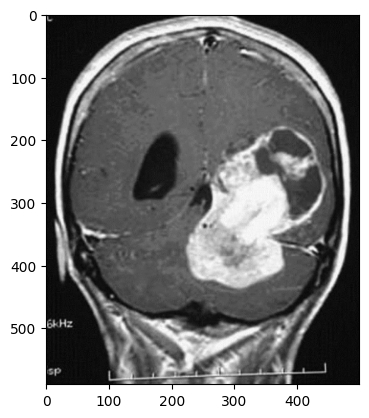

In [15]:
plt.imshow(image)

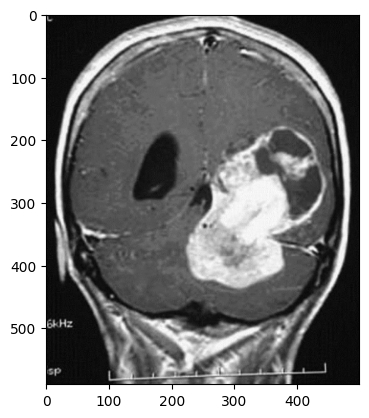

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
plt.imshow(image)

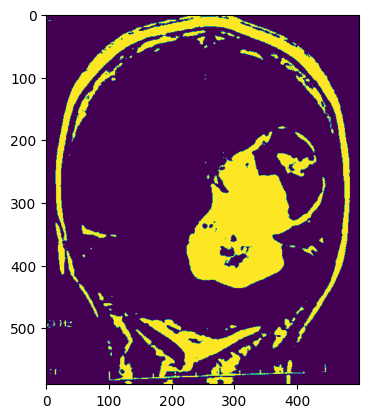

In [17]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

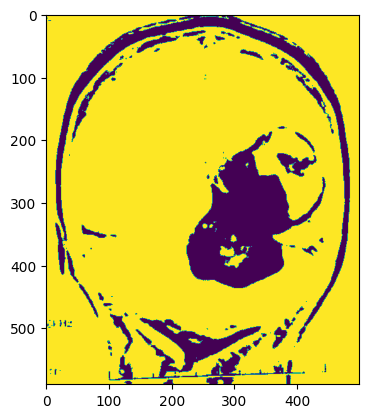

In [18]:
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

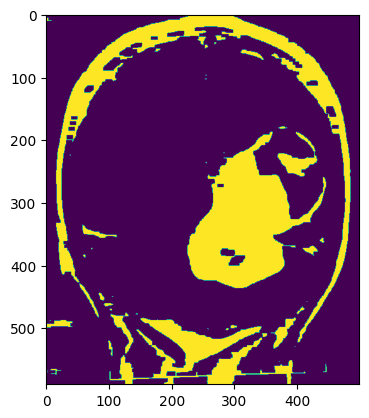

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [20]:
closed = cv2.erode(closed, None, iterations = 19)
closed = cv2.dilate(closed, None, iterations = 17)

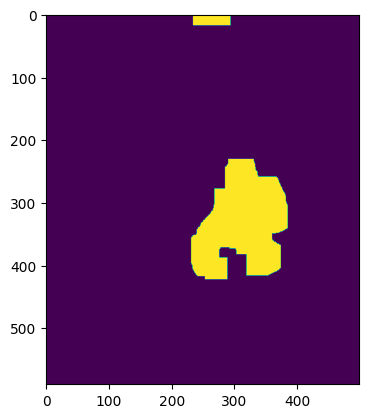

In [21]:
plt.imshow(closed)

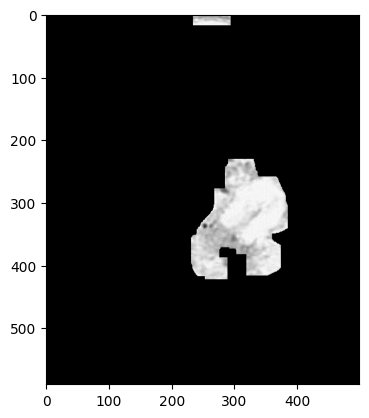

In [22]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
plt.imshow(final)

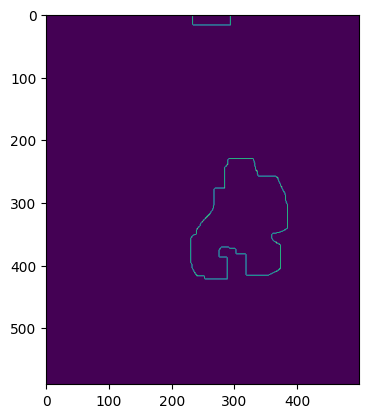

In [23]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_canny(closed)
plt.imshow(canny)

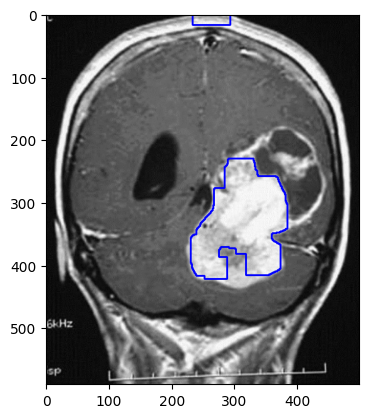

In [24]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
plt.imshow(image) 

In [65]:
import numpy as np 
import pandas as pd 
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
# from fastai import *
# from fastai.vision import *
# from fastai.vision.models import *
print(os.listdir("../ip"))
import torchvision.models as models

['.ipynb_checkpoints', 'brain_tumor_dataset', 'model.pth', 'no', 'Untitled.ipynb', 'yes']


Classes: ['no', 'yes']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

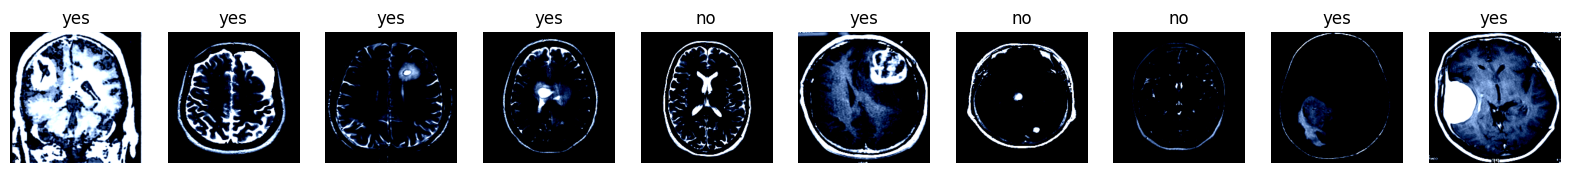

Epoch [1/15], Loss: 1.3044
Epoch [2/15], Loss: 0.5805
Epoch [3/15], Loss: 0.4333
Epoch [4/15], Loss: 0.2928
Epoch [5/15], Loss: 0.2976
Epoch [6/15], Loss: 0.2661
Epoch [7/15], Loss: 0.1526
Epoch [8/15], Loss: 0.1042
Epoch [9/15], Loss: 0.0518
Epoch [10/15], Loss: 0.1558
Epoch [11/15], Loss: 0.0229
Epoch [12/15], Loss: 0.0261
Epoch [13/15], Loss: 0.0067
Epoch [14/15], Loss: 0.0044
Epoch [15/15], Loss: 0.0032


In [63]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the data directory
DATA_DIR = "C:/Users/abhinav/Desktop/ip/brain_tumor_dataset"

# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Load dataset
dataset = torchvision.datasets.ImageFolder(root=DATA_DIR, transform=transform)

# Create DataLoader
train_size = int(0.75 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=24, shuffle=False)

# Print class names
classes = dataset.classes
print(f'Classes: {classes}')

# Show a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plot images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for ax, img, label in zip(axes, images, labels):
    ax.imshow(img.permute(1, 2, 0))  # Convert CHW to HWC format
    ax.set_title(classes[label])
    ax.axis('off')
plt.show()

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 56 * 56, 256)  # Adjust the input size based on your image dimensions
        self.fc2 = nn.Linear(256, len(classes))  # Number of output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)  # Flatten the output
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, define loss function and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training the model
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'model.pth')

# You can add validation and visualization steps as needed

Validation Accuracy: 85.94%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

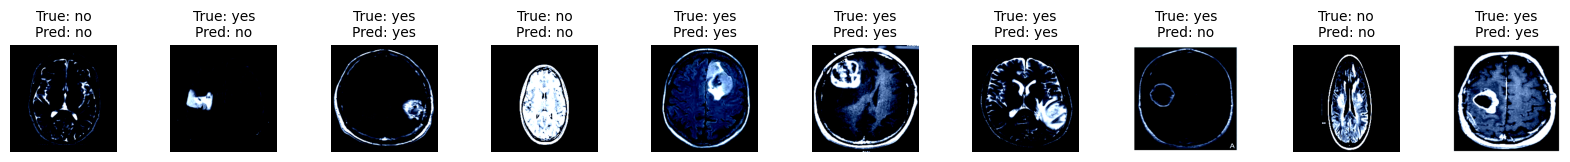

In [70]:
# Validation step
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No gradient calculation for validation
    for images, labels in val_loader:
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted labels
        total += labels.size(0)  # Increment total
        correct += (predicted == labels).sum().item()  # Count correct predictions

print(f'Validation Accuracy: {100 * correct / total:.2f}%')

# Visualization of predictions
def visualize_predictions(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)

    with torch.no_grad():
        outputs = model(images)  # Get model predictions
        _, predicted = torch.max(outputs.data, 1)

    # Plot images and predictions
    fig, axes = plt.subplots(1, 10, figsize=(20, 4))  # Increased height for better visibility
    for ax, img, label, pred in zip(axes, images, labels, predicted):
        ax.imshow(img.permute(1, 2, 0))  # Convert CHW to HWC format
        ax.set_title(f'True: {classes[label]}\nPred: {classes[pred]}', fontsize=10)  # Adjust title font size
        ax.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Add space between subplots
    plt.show()

# Call the visualization function on the validation set
visualize_predictions(val_loader)